In [1]:
#Link to dataset: https://github.com/amankharwal/Birthrate-Analysis/blob/master/births.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'births.csv')

In [3]:
print(df)

       year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [5]:
df.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [6]:
df.dropna(subset=['day'], inplace=True)

In [7]:
df.isna().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [8]:
df['day']= df['day'].astype('int')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15067 entries, 0 to 15066
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15067 non-null  int64 
 1   month   15067 non-null  int64 
 2   day     15067 non-null  int32 
 3   gender  15067 non-null  object
 4   births  15067 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 647.4+ KB


In [10]:
df.describe(include= 'all')

,year,month,day,gender,births
count,15067.000000,15067.000000,15067.000000,15067,15067.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7536,NaN
mean,1978.417402,6.516427,17.769894,NaN,4678.631513
std,5.762018,3.449554,15.284034,NaN,1003.104707
min,1969.000000,1.000000,1.000000,NaN,1.000000
25%,1973.000000,4.000000,8.000000,NaN,4344.000000
50%,1978.000000,7.000000,16.000000,NaN,4785.000000
75%,1983.000000,10.000000,24.000000,NaN,5247.000000


In [11]:
import datetime
list_date= []

for y, m, d in zip(df['year'], df['month'], df['day']):
    the_date= datetime.date(y, m, d)
    list_date.append(the_date)

df['date']= pd.DataFrame(list_date)
print(df.loc[11160:11170, :])

ValueError: day is out of range for month

In [12]:
df['year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], dtype=int64)

In [13]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [14]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 99])

In [15]:
df_drop = df[df['day']== 99]

In [16]:
print(df_drop.index)

Int64Index([   62,    63,   126,   127,   190,   191,   254,   255,   318,
              319,
            ...
            13713, 13776, 13837, 14510, 14511, 14572, 14635, 14696, 14697,
            14944],
           dtype='int64', length=350)


In [17]:
rows_drop =list(df_drop.index)
df = df.drop(rows_drop)

In [18]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [19]:
list_date= []

for y, m, d in zip(df['year'], df['month'], df['day']):
    the_date= datetime.date(y, m, d)
    list_date.append(the_date)

df['date']= pd.DataFrame(list_date, dtype='datetime')
print(df.loc[11160:11170, :])

ValueError: day is out of range for month

In [20]:
ajsn = df[(df['month'].isin([4, 6, 9, 11])) & (df['day'] > 30)] #Checking whether any of the 30-day months has more than 30 days
print(ajsn)

      year  month  day gender  births
252   1969      4   31      F      28
253   1969      4   31      M      24
380   1969      6   31      F      20
381   1969      6   31      M      40
572   1969      9   31      F      38
...    ...    ...  ...    ...     ...
7253  1978      6   31      M       3
7443  1978      9   31      F       2
7444  1978      9   31      M       3
7571  1978     11   31      F       2
7572  1978     11   31      M       3

[71 rows x 5 columns]


In [21]:
feb= df[(df['month']== 2) & (df['day'] > 28)]
print(feb)

       year  month  day gender  births
120    1969      2   29      F      50
121    1969      2   29      M      16
122    1969      2   30      F      24
123    1969      2   30      M      28
124    1969      2   31      F      24
125    1969      2   31      M      20
888    1970      2   29      F      38
889    1970      2   29      M      44
890    1970      2   30      F      20
891    1970      2   30      M      12
892    1970      2   31      F       8
893    1970      2   31      M       6
1656   1971      2   29      F       4
1657   1971      2   30      M       2
1658   1971      2   31      M       6
2420   1972      2   29      F    4663
2421   1972      2   29      M    4919
2422   1972      2   30      F       2
2423   1972      2   31      M       2
3185   1973      2   29      F       3
3186   1973      2   29      M       4
3947   1974      2   29      F       5
3948   1974      2   29      M       2
3949   1974      2   31      F       2
3950   1974      2   31  

The obvious errors are that months like February, April, June, September and November have more than the number of days they should have. Again, looking at the number of births for rows that have the incorrect number of months, it is strange that most of them have less than 100 births per day, considering that this is nationwide data. I will therefore treat these observatios as errors and remove them.

In [22]:
errors = df[df['births'] <1000]

In [23]:
rows_drop = list(errors.index)
df= df.drop(rows_drop)
print(df)

       year  month  day gender  births
0      1969      1    1      F    4046
1      1969      1    1      M    4440
2      1969      1    2      F    4454
3      1969      1    2      M    4548
4      1969      1    3      F    4548
...     ...    ...  ...    ...     ...
15062  1988     12   29      M    5944
15063  1988     12   30      F    5742
15064  1988     12   30      M    6095
15065  1988     12   31      F    4435
15066  1988     12   31      M    4698

[14610 rows x 5 columns]


In [24]:
df= df.reset_index(drop=True)
print(df)

       year  month  day gender  births
0      1969      1    1      F    4046
1      1969      1    1      M    4440
2      1969      1    2      F    4454
3      1969      1    2      M    4548
4      1969      1    3      F    4548
...     ...    ...  ...    ...     ...
14605  1988     12   29      M    5944
14606  1988     12   30      F    5742
14607  1988     12   30      M    6095
14608  1988     12   31      F    4435
14609  1988     12   31      M    4698

[14610 rows x 5 columns]


In [25]:
list_date= []

for y, m, d in zip(df['year'], df['month'], df['day']):
    the_date= datetime.date(y, m, d)
    list_date.append(the_date)

df['date']= pd.DataFrame(list_date, dtype='datetime64[ns]')
print(df)

       year  month  day gender  births       date
0      1969      1    1      F    4046 1969-01-01
1      1969      1    1      M    4440 1969-01-01
2      1969      1    2      F    4454 1969-01-02
3      1969      1    2      M    4548 1969-01-02
4      1969      1    3      F    4548 1969-01-03
...     ...    ...  ...    ...     ...        ...
14605  1988     12   29      M    5944 1988-12-29
14606  1988     12   30      F    5742 1988-12-30
14607  1988     12   30      M    6095 1988-12-30
14608  1988     12   31      F    4435 1988-12-31
14609  1988     12   31      M    4698 1988-12-31

[14610 rows x 6 columns]


In [26]:
df['date'].dtype

dtype('<M8[ns]')

In [27]:
df= df.drop(['year', 'month', 'day'], axis=1)
print(df.columns)

Index(['gender', 'births', 'date'], dtype='object')


In [28]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_name'] = df['date'].dt.day_name()
print(df.head())

  gender  births       date  year  month   day_name
0      F    4046 1969-01-01  1969      1  Wednesday
1      M    4440 1969-01-01  1969      1  Wednesday
2      F    4454 1969-01-02  1969      1   Thursday
3      M    4548 1969-01-02  1969      1   Thursday
4      F    4548 1969-01-03  1969      1     Friday


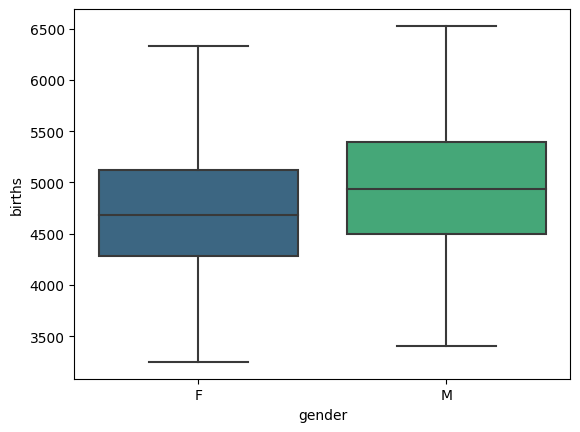

In [29]:
sns.boxplot(data=df, x='gender', y='births', palette='viridis')
plt.show()

In [30]:
def label(plot, title, x_label, y_label):
    '''Annotates plots with title and axes labels
    
    Args:
        plot (FacetGrid or AxesSubplot object): the plot
        title (str) title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        
    Returns:
        FacetGrid or AxesSubplot object: an annotated plot
        '''
    plot.set_title(title)
    plot.set(xlabel=x_label, ylabel=y_label)
    plt.xticks(rotation=45)
    plt.show()

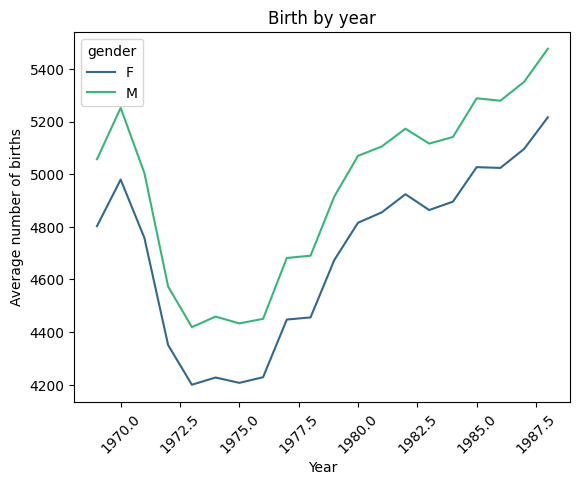

In [31]:
g1= sns.lineplot(data=df, x='year', y='births', hue='gender', palette='viridis', errorbar=None)
label(g1, 'Birth by year', 'Year', 'Average number of births')

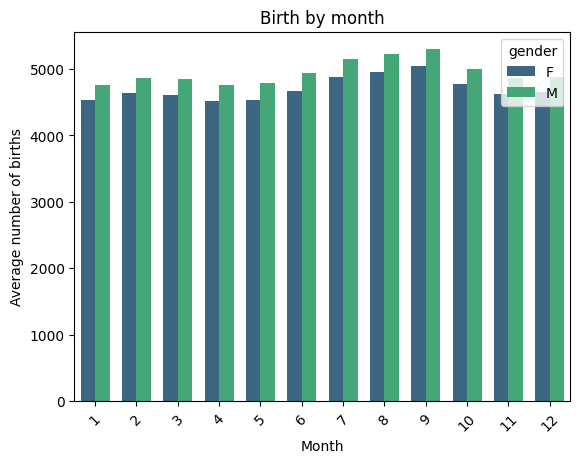

In [32]:
g2= sns.barplot(data=df, x='month', y='births', errorbar=None, hue='gender', palette='viridis', width=0.7)
label(g2, 'Birth by month', 'Month', 'Average number of births')

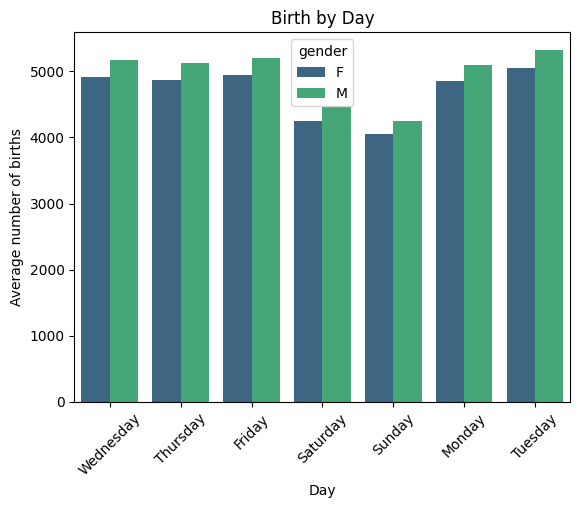

In [33]:
g3= sns.barplot(data=df, x='day_name', y='births', hue='gender', palette='viridis', errorbar=None)
label(g3, 'Birth by Day', 'Day', 'Average number of births')

In [34]:
df['year'].dtype

dtype('int64')

In [35]:
df['year_cat'] = df['year'].astype('category')
print(df.head())

  gender  births       date  year  month   day_name year_cat
0      F    4046 1969-01-01  1969      1  Wednesday     1969
1      M    4440 1969-01-01  1969      1  Wednesday     1969
2      F    4454 1969-01-02  1969      1   Thursday     1969
3      M    4548 1969-01-02  1969      1   Thursday     1969
4      F    4548 1969-01-03  1969      1     Friday     1969


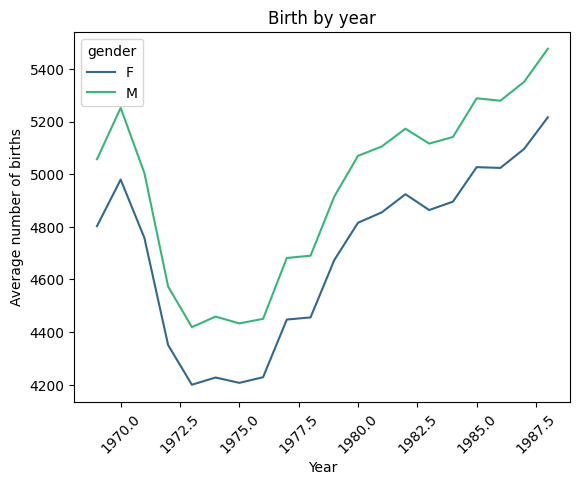

In [36]:
g4= sns.lineplot(data=df, x='year_cat', y='births', hue='gender', palette='viridis', errorbar=None)
label(g4, 'Birth by year', 'Year', 'Average number of births')